## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [25]:
train, test = keras.datasets.cifar10.load_data()

In [26]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [27]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [28]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [29]:
LEARNING_RATE = 1e-3
EPOCHS = 25 
BATCH_SIZE = 1024

In [30]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""

reduce_lr_factor = [0.5,0.2]
redice_lr_patient = [5,10,25]

In [34]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.50, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 5s 95us/step - loss: 1.2596 - acc: 0.5628 - val_loss: 1.4849 - val_acc: 0.4809
Epoch 14/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.2369 - acc: 0.5717 - val_loss: 1.4830 - val_acc: 0.4820
Epoch 15/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.2175 - acc: 0.5769 - val_loss: 1.4683 - val_acc: 0.4863
Epoch 16/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.1969 - acc: 0.5874 - val_loss: 1.4543 - val_acc: 0.4911
Epoch 17/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.1779 - acc: 0.5924 - val_loss: 1.4610 - val_acc: 0.4920
Epoch 18/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.1585 - acc: 0.5992 - val_loss: 1.4505 - val_acc: 0.4953
Epoch 19/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.1404 - acc: 0.6068 - val_loss: 1.4514 - val_acc: 0.4948
Epoch 20/25
50000/50000 [=====================

50000/50000 [==============================] - 7s 140us/step - loss: 2.2307 - acc: 0.2701 - val_loss: 2.1584 - val_acc: 0.3021
Epoch 2/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.7555 - acc: 0.3891 - val_loss: 1.8286 - val_acc: 0.3789
Epoch 3/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.6278 - acc: 0.4280 - val_loss: 1.6906 - val_acc: 0.4066
Epoch 4/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.5526 - acc: 0.4536 - val_loss: 1.6241 - val_acc: 0.4289
Epoch 5/25
50000/50000 [==============================] - 5s 96us/step - loss: 1.4958 - acc: 0.4731 - val_loss: 1.6014 - val_acc: 0.4384
Epoch 6/25
50000/50000 [==============================] - 5s 96us/step - loss: 1.4493 - acc: 0.4912 - val_loss: 1.5608 - val_acc: 0.4472
Epoch 7/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.4119 - acc: 0.5051 - val_loss: 1.5395 - val_acc: 0.4566
Epoch 8/25
50000/50000 [===========================

50000/50000 [==============================] - 5s 95us/step - loss: 1.0366 - acc: 0.6461 - val_loss: 1.4308 - val_acc: 0.4980
Epoch 25/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.0205 - acc: 0.6512 - val_loss: 1.4262 - val_acc: 0.4996
Numbers of exp: 5, reduce_factor: 0.20, reduce_patient: 25
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_31 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

50000/50000 [==============================] - 5s 102us/step - loss: 0.9251 - acc: 0.6760 - val_loss: 1.7644 - val_acc: 0.4197
Epoch 12/25
50000/50000 [==============================] - 5s 101us/step - loss: 0.8746 - acc: 0.6937 - val_loss: 1.7910 - val_acc: 0.4167

Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 13/25
50000/50000 [==============================] - 5s 100us/step - loss: 0.7663 - acc: 0.7395 - val_loss: 1.4988 - val_acc: 0.4943
Epoch 14/25
50000/50000 [==============================] - 5s 101us/step - loss: 0.7147 - acc: 0.7582 - val_loss: 1.5252 - val_acc: 0.4902
Epoch 15/25
50000/50000 [==============================] - 5s 100us/step - loss: 0.6826 - acc: 0.7706 - val_loss: 1.6160 - val_acc: 0.4706
Epoch 16/25
50000/50000 [==============================] - 5s 101us/step - loss: 0.6521 - acc: 0.7826 - val_loss: 1.5453 - val_acc: 0.4933
Epoch 17/25
50000/50000 [==============================] - 5s 101us/step - loss: 0.6226 - acc: 0.

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 167us/step - loss: 1.8950 - acc: 0.3548 - val_loss: 1.8639 - val_acc: 0.3587
Epoch 2/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.5572 - acc: 0.4528 - val_loss: 1.8268 - val_acc: 0.3666
Epoch 3/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.4591 - acc: 0.4884 - val_loss: 1.6523 - val_acc: 0.4284
Epoch 4/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.3965 - acc: 0.5135 - val_loss: 1.6188 - val_acc: 0.4337
Epoch 5/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.3444 - acc: 0.5307 - val_loss: 1.5233 - val_acc: 0.4698
Epoch 6/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.3043 - acc: 0.5467 - val_loss: 1.5683 - val_acc: 0.4539
Epoch 7/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.2692 - acc: 0.5636 - val_loss: 1.5115 - 

50000/50000 [==============================] - 5s 102us/step - loss: 0.8901 - acc: 0.7074 - val_loss: 1.3827 - val_acc: 0.5143
Epoch 24/25
50000/50000 [==============================] - 5s 102us/step - loss: 0.8851 - acc: 0.7089 - val_loss: 1.3841 - val_acc: 0.5168
Epoch 25/25
50000/50000 [==============================] - 5s 102us/step - loss: 0.8821 - acc: 0.7092 - val_loss: 1.3828 - val_acc: 0.5149
Numbers of exp: 10, reduce_factor: 0.20, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_

50000/50000 [==============================] - 5s 105us/step - loss: 1.4633 - acc: 0.4906 - val_loss: 1.5910 - val_acc: 0.4363
Epoch 11/25
50000/50000 [==============================] - 5s 104us/step - loss: 1.4459 - acc: 0.4974 - val_loss: 1.5834 - val_acc: 0.4383
Epoch 12/25
50000/50000 [==============================] - 5s 106us/step - loss: 1.4307 - acc: 0.5018 - val_loss: 1.5773 - val_acc: 0.4389
Epoch 13/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.4164 - acc: 0.5074 - val_loss: 1.5709 - val_acc: 0.4449
Epoch 14/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.4029 - acc: 0.5129 - val_loss: 1.5614 - val_acc: 0.4456
Epoch 15/25
50000/50000 [==============================] - 5s 106us/step - loss: 1.3913 - acc: 0.5179 - val_loss: 1.5508 - val_acc: 0.4517
Epoch 16/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.3789 - acc: 0.5208 - val_loss: 1.5497 - val_acc: 0.4499
Epoch 17/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 9s 173us/step - loss: 1.9710 - acc: 0.3298 - val_loss: 1.9700 - val_acc: 0.3566
Epoch 2/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.6455 - acc: 0.4271 - val_loss: 1.7942 - val_acc: 0.3850
Epoch 3/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.5301 - acc: 0.4661 - val_loss: 1.7495 - val_acc: 0.3931
Epoch 4/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.4544 - acc: 0.4924 - val_loss: 1.8535 - val_acc: 0.3701
Epoch 5/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.3939 - acc: 0.5126 - val_loss: 1.6487 - val_acc: 0.4243
Epoch 6/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.3423 - acc: 0.5328 - val_loss: 1.6001 - val_acc: 0.4317
Epoch 7/25
50000/50000 [==============================] - 5s 104us/step - loss: 1.2984 - acc: 0.5494 - val_loss: 1.6864 - 

Epoch 24/25
50000/50000 [==============================] - 5s 103us/step - loss: 0.8315 - acc: 0.7241 - val_loss: 1.4858 - val_acc: 0.4967
Epoch 25/25
50000/50000 [==============================] - 5s 103us/step - loss: 0.8125 - acc: 0.7310 - val_loss: 1.5235 - val_acc: 0.4867
Numbers of exp: 15, reduce_factor: 0.20, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_61 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
bat

Epoch 11/25
50000/50000 [==============================] - 5s 104us/step - loss: 1.4816 - acc: 0.4854 - val_loss: 1.6334 - val_acc: 0.4338
Epoch 12/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.4568 - acc: 0.4952 - val_loss: 1.6173 - val_acc: 0.4372
Epoch 13/25
50000/50000 [==============================] - 5s 104us/step - loss: 1.4356 - acc: 0.5025 - val_loss: 1.6044 - val_acc: 0.4468
Epoch 14/25
50000/50000 [==============================] - 5s 104us/step - loss: 1.4156 - acc: 0.5101 - val_loss: 1.5945 - val_acc: 0.4413
Epoch 15/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.3950 - acc: 0.5177 - val_loss: 1.5854 - val_acc: 0.4505
Epoch 16/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.3782 - acc: 0.5228 - val_loss: 1.5803 - val_acc: 0.4534
Epoch 17/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.3603 - acc: 0.5315 - val_loss: 1.5634 - val_acc: 0.4578
Epoch 18/25
50000/50000 [==

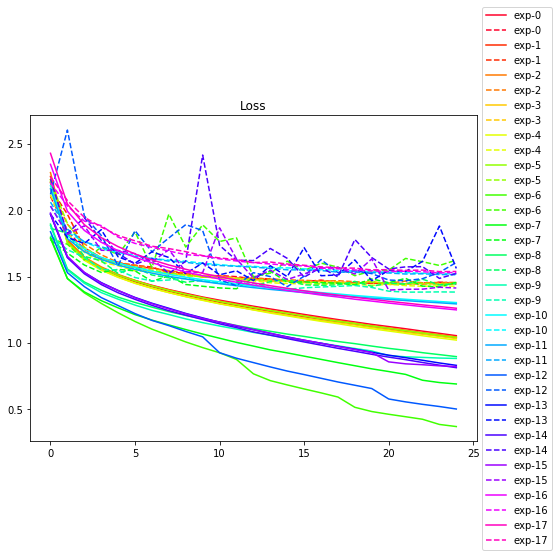

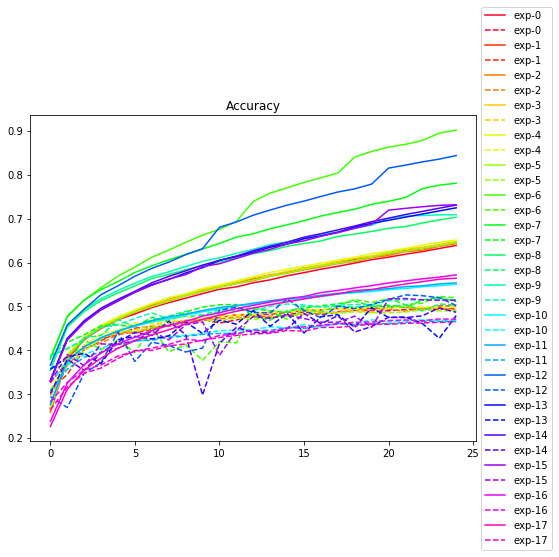

In [35]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()